## Importing The Libraries

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_openml

from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

## EDA

### Reading the Data

In [2]:
openml = fetch_openml(data_id = 40966)
x = pd.DataFrame(openml.data)
y = pd.DataFrame(openml.target)

In [3]:
x.shape, y.shape

((1080, 77), (1080, 1))

### Checking For Null Values

In [4]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


### Replacing Null Values By Mean

In [5]:
for i in list(x.columns):
    a = x[i].mean(axis = 0)
    x[i].fillna(a, inplace = True)
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
72    0
73    0
74    0
75    0
76    0
Length: 77, dtype: int64

### Label Encoding Y Variable

In [6]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))
y = y.astype('category')

/Users/nmims/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Building

### Splitting Data Into Train & Test

In [7]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

### Building The Model

In [8]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (77, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64))
model.add(layers.LeakyReLU(alpha = 0.01))
model.add(layers.Dense(8, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Setting Callbacks and Running It

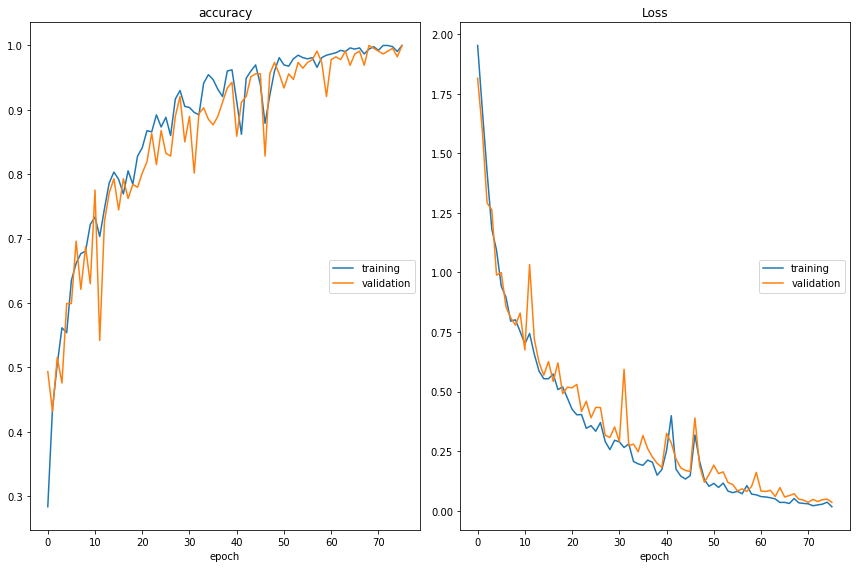

accuracy
	training         	 (min:    0.284, max:    1.000, cur:    1.000)
	validation       	 (min:    0.432, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.017, max:    1.953, cur:    0.017)
	validation       	 (min:    0.036, max:    1.815, cur:    0.036)
27/27 [==============================] - 0s 15ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 00076: early stopping


In [9]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, verbose = 1)
cb = [es, PlotLossesKeras()]

model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.3, callbacks = cb)

### Checking The Test Accuracy

In [10]:
_, acc = model.evaluate(x_test, y_test)
print('The Model Accuracy On Test Set is:', acc*100)

11/11 [==============================] - 0s 834us/step - loss: 0.0333 - accuracy: 0.9969
The Model Accuracy On Test Set is: 99.69135522842407
